In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

ds1 = pd.read_csv('ds/TestCorcovo/RE_MP_mem.csv')

ds1.head()

,AO1,AO2,AO3,AO4,AO5,WLR,XL,a1,a2,a3,...,aw1,aw2,aw3,aw4,aw5,ch1,ch2,ch3,ch4,ch5
0,-0.100,-0.006,-0.068,1.286,0.188,55.1,0.58,30092.84,2730.26,28477.1,...,-0.0165,4.5484,0.8072,0.7896,8.3758,6576.060889,145.759695,5807.892566,600.877711,16.196712
1,0.000,0.025,0.000,1.311,0.222,54.2,0.60,30092.84,2730.26,28477.1,...,-0.0165,4.5484,0.8072,0.7896,8.3758,6576.060889,145.759695,5807.892566,600.877711,16.196712
2,0.649,0.258,0.143,1.389,0.290,48.2,0.71,30092.84,2730.26,28477.1,...,-0.0165,4.5484,0.8072,0.7896,8.3758,6576.060889,145.759695,5807.892566,600.877711,16.196712
3,1.167,0.468,0.286,1.487,0.380,48.9,0.72,30092.84,2730.26,28477.1,...,-0.0165,4.5484,0.8072,0.7896,8.3758,6576.060889,145.759695,5807.892566,600.877711,16.196712
4,1.647,0.672,0.429,1.593,0.479,54.2,0.65,30092.84,2730.26,28477.1,...,-0.0165,4.5484,0.8072,0.7896,8.3758,6576.060889,145.759695,5807.892566,600.877711,16.196712


In [2]:
import numpy as np

n = 30
#def inputs
A = np.full((n,5),[6576.1,145.8,5807.9,600.9,16.19671])
aw = np.full((n,5),[-0.0165,4.5484,0.8072,0.7896,8.38])
acal = np.full((n,5),[30092.8,2730.3,28477.1,4664.3,3531.6])
wc = ds1['WLR']
Xl = ds1['XL']


aw_d = pd.DataFrame(aw)
acal_d = pd.DataFrame(acal)

A1 = -np.log(A/acal)
A1 = pd.DataFrame(A1)
#def outputs
outputs = ds1[['AO1','AO2','AO3','AO4','AO5']]


inputs = pd.DataFrame(ds1[['WLR','XL']])
inputs[['aw1','aw2','aw3','aw4','aw5']] = aw_d[:]
inputs[['acal1','acal2','acal3','acal4','acal5']] = A1[:]

#inputs = pd.DataFrame(ds1[['PC1 [nA]','PC2 [nA]','PC3 [nA]','PC4 [nA]','XL [-]']])
#inputs[['aw1','aw2','aw3','aw4']] = aw_d[:]
#inputs[['ao1','ao2','ao3','ao4']] = ao_d[:]
#inputs.head()
print(inputs.head())
print(outputs.head())

    WLR    XL     aw1     aw2     aw3     aw4   aw5     acal1     acal2  \
0  55.1  0.58 -0.0165  4.5484  0.8072  0.7896  8.38  1.520844  2.929931   
1  54.2  0.60 -0.0165  4.5484  0.8072  0.7896  8.38  1.520844  2.929931   
2  48.2  0.71 -0.0165  4.5484  0.8072  0.7896  8.38  1.520844  2.929931   
3  48.9  0.72 -0.0165  4.5484  0.8072  0.7896  8.38  1.520844  2.929931   
4  54.2  0.65 -0.0165  4.5484  0.8072  0.7896  8.38  1.520844  2.929931   

      acal3     acal4     acal5  
0  1.589881  2.049265  5.384698  
1  1.589881  2.049265  5.384698  
2  1.589881  2.049265  5.384698  
3  1.589881  2.049265  5.384698  
4  1.589881  2.049265  5.384698  
     AO1    AO2    AO3    AO4    AO5
0 -0.100 -0.006 -0.068  1.286  0.188
1  0.000  0.025  0.000  1.311  0.222
2  0.649  0.258  0.143  1.389  0.290
3  1.167  0.468  0.286  1.487  0.380
4  1.647  0.672  0.429  1.593  0.479


In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(inputs,outputs, test_size= 0.3, random_state=42)

In [12]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

rf_model = RandomForestRegressor(random_state=1)
rf_model.fit(inputs, outputs)
rf_val_predictions = rf_model.predict(X_test)
rf_val_mae = mean_absolute_error(rf_val_predictions, y_test)

print("Validation MAE for Random Forest Model: {:,.0f}".format(rf_val_mae))

Validation MAE for Random Forest Model: 0


/Users/marcossoto/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


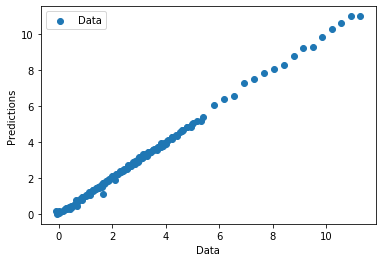

In [13]:
import matplotlib.pyplot as plt

plt.scatter(outputs, rf_model.predict(inputs), label='Data')
plt.xlabel('Data')
plt.ylabel('Predictions')
plt.legend()
plt.show()

In [39]:
#individual prediction

#dataset input
#x = inputs.loc[:0]
y = outputs.loc[:0]
#manual input 
# 'WLR', 'XL', 'aw1', 'aw2', 'aw3', 'aw4', 'aw5', 'acal1', 'acal2', 'acal3', 'acal4', 'acal5'

WLR = 70
XL = 0.5
aw1 = -0.01
aw2 = 4.54
aw3 = 0.8
aw4 = 0.7896
aw5 = 8.37
acal1 = 30092.84
acal2 = 2730.26
acal3 = 28477
acal4 = 4664
acal5 = 3531
x = pd.DataFrame([[WLR,XL,aw1,aw2,aw3,aw4,aw5,acal1,acal2,acal3,acal4,acal5]])



print('best memory = ', rf_model.predict(x) )
#print('Trained value = ', y )

best memory =  [[2.5456 1.0674 0.714  1.8196 0.6898]]
